In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/InputFile.csv')
df.head()

,Wafer,Sensor - 1,Sensor - 2,Sensor - 3,Sensor - 4,Sensor - 5,Sensor - 6,Sensor - 7,Sensor - 8,Sensor - 9,...,Sensor - 582,Sensor - 583,Sensor - 584,Sensor - 585,Sensor - 586,Sensor - 587,Sensor - 588,Sensor - 589,Sensor - 590,Output
0,1201,3045.98,2544.85,2253.3444,1873.8678,1.1691,100.0,94.9722,0.1210,1.4752,...,NaN,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1
1,1202,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.0,100.6222,0.1250,1.4536,...,NaN,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1
2,1203,3071.18,2489.86,2195.3000,1151.8233,0.9220,100.0,103.5467,0.1232,1.4826,...,NaN,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1
3,1204,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.0,100.1367,0.1243,1.4645,...,NaN,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1
4,1205,3196.21,2413.39,2255.5222,1763.0739,1.2226,100.0,101.5878,0.1200,1.4845,...,353.8319,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1


In [4]:
df.shape

(837, 592)

In [5]:
from sklearn.model_selection import train_test_split
wafer,wafer_test=train_test_split(df,test_size=0.2,random_state=42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Columns: 592 entries, Wafer to Output
dtypes: float64(590), int64(2)
memory usage: 3.8 MB


In [7]:
df.describe()

,Wafer,Sensor - 1,Sensor - 2,Sensor - 3,Sensor - 4,Sensor - 5,Sensor - 6,Sensor - 7,Sensor - 8,Sensor - 9,...,Sensor - 582,Sensor - 583,Sensor - 584,Sensor - 585,Sensor - 586,Sensor - 587,Sensor - 588,Sensor - 589,Sensor - 590,Output
count,837.000000,836.000000,834.000000,824.000000,824.000000,824.000000,824.0,824.000000,829.000000,835.000000,...,335.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1119.000000,3020.762560,2495.829916,2200.208587,1474.891287,6.792812,100.0,99.901496,0.121398,1.448893,...,96.403949,0.499950,0.015053,0.003768,3.015719,0.023074,0.015922,0.005121,91.393672,-0.911589
std,241.765382,80.110713,71.607771,30.926326,530.078688,77.296175,0.0,7.712145,0.012149,0.079059,...,90.001072,0.003258,0.016511,0.003582,3.446470,0.013394,0.009087,0.003061,89.302699,0.411349
min,701.000000,2770.400000,2233.290000,2060.660000,0.000000,0.753100,100.0,82.131100,0.000000,1.200500,...,0.000000,0.477800,0.006000,0.002000,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,910.000000,2970.750000,2452.182500,2184.213875,1110.206750,1.093650,100.0,95.836675,0.121200,1.394950,...,43.832600,0.497900,0.011600,0.003100,2.305900,0.015300,0.009800,0.003200,41.078200,-1.000000
50%,1119.000000,3014.290000,2499.735000,2202.188900,1298.430900,1.317100,100.0,100.180000,0.122700,1.441800,...,69.299400,0.499900,0.013600,0.003500,2.718400,0.021800,0.014500,0.004500,65.484200,-1.000000
75%,1328.000000,3061.625000,2537.675000,2216.500000,1751.834850,1.572600,100.0,104.336700,0.124000,1.502550,...,116.395700,0.502100,0.016300,0.004000,3.252200,0.027800,0.019300,0.006000,104.303400,-1.000000
max,1537.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,...,737.304800,0.509500,0.471400,0.103900,98.662800,0.102800,0.079900,0.028600,737.304800,1.000000


In [8]:
wafer['Output'].value_counts()

Output
-1    638
 1     31
Name: count, dtype: int64

 give dataset is highly imbalance

In [9]:
wafer['Output'].isnull().sum()

0

no missing value in target feature


In [10]:
# check missing value in independent features 
wafer.isna().sum().sum()/(wafer.shape[0]*(wafer.shape[1]-1))

0.03858576201568621

almost 4% values are missing we need use imputation strategies to handle it

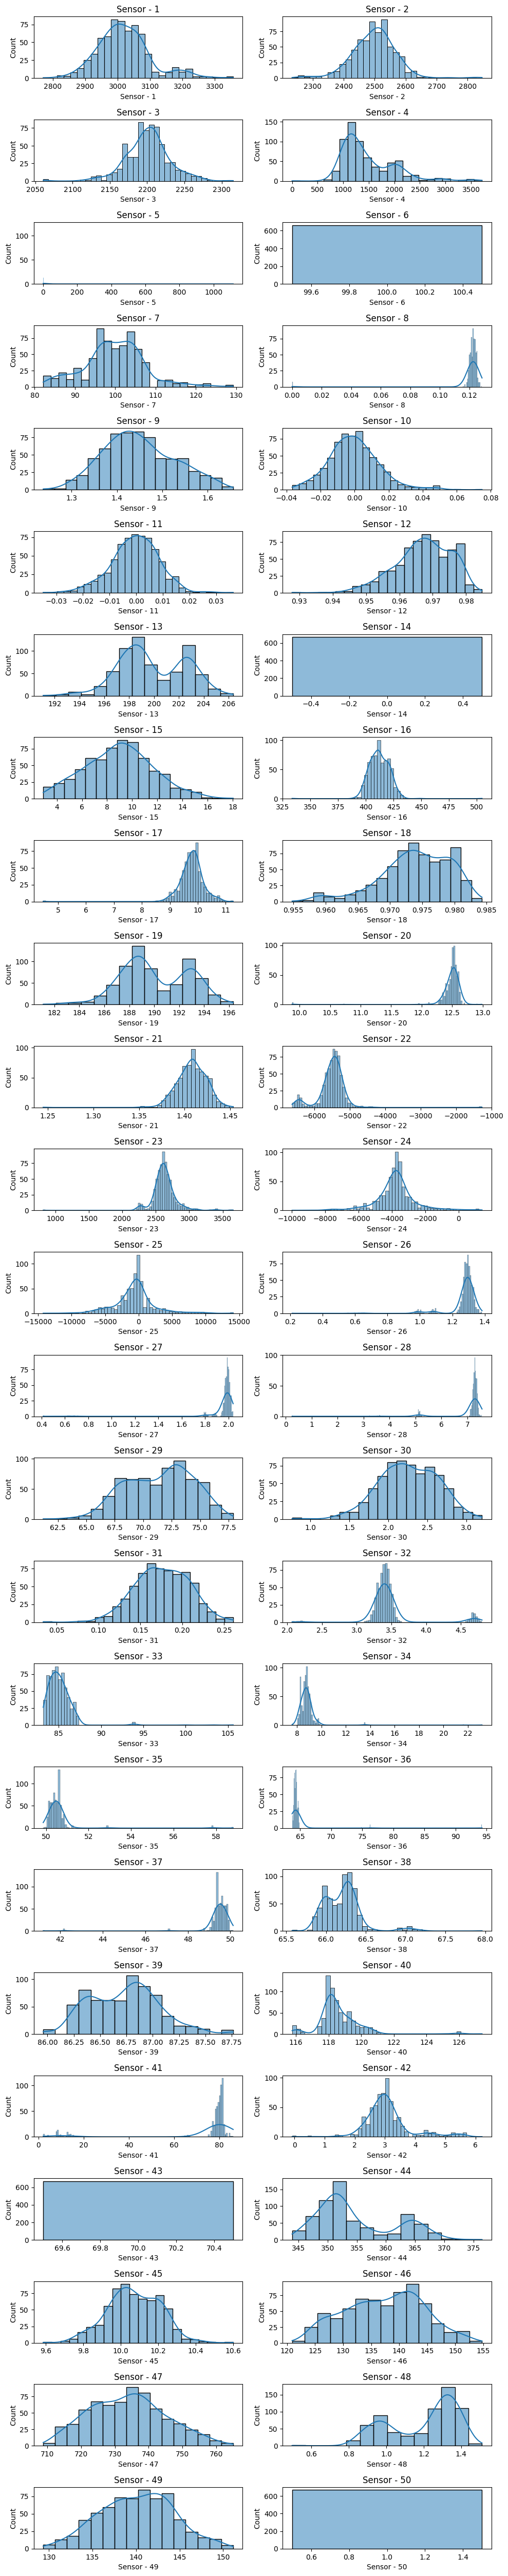

In [11]:
plt.figure(figsize=(10,100))
for i, feature in enumerate(wafer.columns[1:51]):
    # Create a subplot in a 50x2 grid at position i+1
    plt.subplot(50, 2, i + 1)
    sns.histplot(x=wafer[feature], kde=True)  # kde=True for KDE plot, kde=False for just histogram
    plt.title(feature)

plt.tight_layout()
plt.show()


In [12]:
def get_cols_with_zero_std_dev(df:pd.DataFrame):
    cols_to_drop=[]
    num_cols=df.select_dtypes(exclude=['object'])
    for col in num_cols.columns:
        if df[col].std()==0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df:pd.DataFrame,missing_thred=.7):
    cols_missing_rations=df.isna().sum().div(df.shape[0])
    cols_to_drop=list(cols_missing_rations[cols_missing_rations>missing_thred].index)
    return cols_to_drop


In [13]:
cols_to_drop1=get_cols_with_zero_std_dev(wafer)
cols_to_drop2=get_redundant_cols(wafer)
cols_to_drop=cols_to_drop1+cols_to_drop2

In [14]:
x,y=wafer.drop(cols_to_drop,axis=1),wafer['Output']

In [15]:
x.shape,y.shape

((669, 468), (669,))

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

imputer=KNNImputer(n_neighbors=3)
preprocessing_pipeline=Pipeline(
    steps=[('Imputer',imputer),('Scaler',RobustScaler())]
)




In [17]:
X_trans=preprocessing_pipeline.fit_transform(x)


[[ 0.02830189  0.10760171  0.87636191 ...  0.57142857 -0.21729502
   0.        ]
 [-0.23820755  0.42997859  2.06252961 ... -0.46428571  0.34169089
   0.        ]
 [-0.6745283  -0.80620985 -0.00828991 ...  0.07142857  0.
   0.        ]
 ...
 [-0.19103774 -0.77708779  1.14081004 ... -0.92857143 -0.52512566
   0.        ]
 [ 0.19811321 -1.12462527  0.02025107 ...  0.35714286  0.99586576
   0.        ]
 [-0.97169811 -0.22430407 -0.19078636 ... -0.46428571 -0.61536335
   0.        ]]
